# Generate trial-by-trial model predictions

Natalia Vélez, March 2022

In this notebook, we generate model-based regressors for use in the general linear model.

In [1]:
    %matplotlib inline
import sys, pprint
import numpy as np
import pandas as pd
import teaching_models as teach
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, entropy

sys.path.append('..')
from utils import gsearch, int_extract, read_json

sns.set_context('talk')
sns.set_style('white')

Loading teaching problems
{'A': [[0, 0, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 0, 0]],
 'B': [[1, 1, 1, 0, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]],
 'C': [[0, 0, 0, 1, 1, 1],
       [0, 0, 0, 1, 1, 1],
       [0, 0, 1, 1, 1, 1],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]],
 'D': [[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1]]}
Participants excluded from analysis:
[3, 17]
Cleaning up human behavioral data
    subject  run  block_idx  ex_idx first_movement   start  problem  \
0         1    1          0       0         [0, 1]  [0, 0]       22   
1         1    1          0       1         [0, 1]  [0, 0]       22   
3         1    1          1   

## Main model: Literal belief

### Generate trial-by-trial parametric regressors

Find MLE files:

In [2]:
param_files = gsearch('outputs/fit_model-literal_pref_cost_method-optimize/*.json')
param_files.sort()

print(f'Found {len(param_files)} files')
print(*param_files[:10], sep='\n')
print('...')

Found 28 files
outputs/fit_model-literal_pref_cost_method-optimize/sub-01_model-literal_pref_cost_method-optimize_result.json
outputs/fit_model-literal_pref_cost_method-optimize/sub-02_model-literal_pref_cost_method-optimize_result.json
outputs/fit_model-literal_pref_cost_method-optimize/sub-04_model-literal_pref_cost_method-optimize_result.json
outputs/fit_model-literal_pref_cost_method-optimize/sub-05_model-literal_pref_cost_method-optimize_result.json
outputs/fit_model-literal_pref_cost_method-optimize/sub-06_model-literal_pref_cost_method-optimize_result.json
outputs/fit_model-literal_pref_cost_method-optimize/sub-07_model-literal_pref_cost_method-optimize_result.json
outputs/fit_model-literal_pref_cost_method-optimize/sub-08_model-literal_pref_cost_method-optimize_result.json
outputs/fit_model-literal_pref_cost_method-optimize/sub-09_model-literal_pref_cost_method-optimize_result.json
outputs/fit_model-literal_pref_cost_method-optimize/sub-10_model-literal_pref_cost_method-optimiz

Load MLE:

In [3]:
weights = {}

for f in param_files:
    # read model-fitting results
    res = read_json(f)

    # save subject, param values
    sub = int_extract('(?<=sub-)[0-9]{2}', f)
    sub_w = np.array(res['x'])

    weights[sub] = sub_w
    
pprint.pprint(weights)

{1: array([ 1.68508242, 40.8164984 ,  3.02855325]),
 2: array([ 2.95306824, 16.58547064,  3.05288549]),
 4: array([ 3.09025592, 56.10968639,  4.3907787 ]),
 5: array([ 1.39420587, 24.82426821,  2.9046522 ]),
 6: array([ 2.26613402, 29.06569518,  3.14474153]),
 7: array([ 0.87024458, 36.04767132,  1.81094908]),
 8: array([ 1.89562701, 33.6057211 ,  2.88741632]),
 9: array([ 1.75176956, 15.85689667,  2.89437891]),
 10: array([ 1.9570947 , 50.24240606,  4.65991292]),
 11: array([ 5.32169951, 29.73589082,  1.31726024]),
 12: array([ 3.84728844, 43.96987567,  3.12131075]),
 13: array([ 3.6460504 , 43.45169563,  2.5266896 ]),
 14: array([1.48032023, 5.8788781 , 5.73460501]),
 15: array([ 1.82380008, 30.01679664,  4.40844895]),
 16: array([ 2.37600838, 25.90205024,  3.89796746]),
 18: array([ 1.49815699, 33.51840774,  4.73648424]),
 19: array([ 3.1059062 , 47.13130048,  3.83116833]),
 20: array([ 3.93802504, 38.99434197,  5.23414629]),
 21: array([ 1.27712885, 40.94039639,  1.80238164]),
 22:

Main loop: Use parameter values, behavioral data to generate trial-by-trial predictions

In [4]:
model_list = []

for sub, sub_data in teach.human_df.groupby('subject'):
    print('===== sub-%02d =====' % sub)
    # get subject-specific weights
    sub_w = weights[sub]

    for prob, prob_data in sub_data.groupby('problem'):
        preds = teach.utility_model_predictions(data=prob_data, 
                                                sampling_fun=teach.strong_sampling,
                                                pref_fun=teach.edge_pref, 
                                                weights=sub_w)
        model_list += preds

===== sub-01 =====
===== sub-02 =====
===== sub-04 =====
===== sub-05 =====
===== sub-06 =====
===== sub-07 =====
===== sub-08 =====
===== sub-09 =====
===== sub-10 =====
===== sub-11 =====
===== sub-12 =====
===== sub-13 =====
===== sub-14 =====
===== sub-15 =====
===== sub-16 =====
===== sub-18 =====
===== sub-19 =====
===== sub-20 =====
===== sub-21 =====
===== sub-22 =====
===== sub-23 =====
===== sub-24 =====
===== sub-25 =====
===== sub-26 =====
===== sub-27 =====
===== sub-28 =====
===== sub-29 =====
===== sub-30 =====


(New) Compute KL divergence in a way that's consistent with empirically-derived KL

In [5]:
def clean_ph(raw):
    '''
    Helper function: Extract belief distribution
    '''
    return np.array([r[1] for r in raw])

# Clean up belief distribution
model_raw = pd.DataFrame(model_list)
model_raw['pH'] = model_raw.pH.apply(clean_ph)

kl_list = []
# Compute KL divergence with an adjustment for small probabilities
for name,group in model_raw.groupby(['subject', 'problem']):
    prior = np.ones(4)/4 # start with a uniform prior
    
    for _, row in group.iterrows():
        pH_adjusted = row.pH + 0.0001 # small adjustment to fix divide-by-0 error
        belief = pH_adjusted/np.sum(pH_adjusted)
        kl = entropy(prior, belief)
        
        prior = belief # carry over belief dist from prior trial
        kl_list.append(kl)
model_raw['KL'] = kl_list
model_raw['logp'] = np.log(model_raw['pTrue']/(1-model_raw['pTrue']))

model_raw.head()

,subject,run,block_idx,ex_idx,first_movement,start,problem,order,example,cursor_coords,...,cursor,model,lik,pD,pTrue,pH,entropy,delta,KL,logp
0,1,7,2,0,"[1, 5]","[0, 5]",0,"['C', 'D', 'A', 'B']",33,"[0, 5]",...,5,utility,0.035637,"[(0, 0.0), (1, 0.0), (2, 0.1196783891390634), ...",0.500000,"[0.5, 0.0, 0.0, 0.5]",0.693147,0.250000,3.565749,0.000000
1,1,7,2,1,"[1, 5]","[0, 5]",0,"['C', 'D', 'A', 'B']",32,"[5, 3]",...,33,utility,0.122000,"[(0, 0.0), (1, 0.0), (2, 0.08629358253601628),...",0.500000,"[0.5, 0.0, 0.0, 0.5]",0.693147,0.000000,0.000000,0.000000
2,1,7,2,2,"[1, 5]","[0, 5]",0,"['C', 'D', 'A', 'B']",2,"[5, 2]",...,32,utility,0.138108,"[(0, 0.0), (1, 0.0), (2, 0.13810811518675548),...",1.000000,"[1.0, 0.0, 0.0, 0.0]",0.000000,0.500000,3.911391,inf
3,1,1,2,0,"[5, 4]","[5, 5]",1,"['A', 'D', 'C', 'B']",31,"[5, 5]",...,35,utility,0.096641,"[(0, 0.0), (1, 0.04209671745663986), (2, 0.020...",0.333333,"[0.3333333333333333, 0.3333333333333333, 0.333...",1.098612,0.083333,1.740425,-0.693147
4,1,1,2,1,"[5, 4]","[5, 5]",1,"['A', 'D', 'C', 'B']",1,"[5, 1]",...,31,utility,0.214315,"[(0, 0.0), (1, 0.214315489256822), (2, 0.05253...",1.000000,"[1.0, 0.0, 0.0, 0.0]",0.000000,0.666667,5.041377,inf


Save model predictions to dataframe:

In [20]:
param_reg = ['pTrue', 'entropy', 'delta', 'KL', 'logp']
# convert to df
model_df = model_raw.copy()
model_df = model_df[['subject', 'run', 'block_idx', 'ex_idx', 'problem', 'pH'] + param_reg]
model_df['pH'] = model_df.pH.apply(list)
model_df['pTrue_unscaled'] = model_df['pTrue'].copy()
model_df['KL_unscaled'] = model_df['KL'].copy()

# mean-center parametric regressors
def mean_center(col, df=model_df):
    means = df.groupby('subject')[col].transform('mean')
    return df[col] - means

for r in param_reg:
    model_df[r] = mean_center(r)

print(model_df.shape)
model_df.head()

(3213, 13)


,subject,run,block_idx,ex_idx,problem,pH,pTrue,entropy,delta,KL,logp,pTrue_unscaled,KL_unscaled
0,1,7,2,0,0,"[0.5, 0.0, 0.0, 0.5]",0.040123,-0.165064,0.155093,2.341827,-inf,0.500000,3.565749
1,1,7,2,1,0,"[0.5, 0.0, 0.0, 0.5]",0.040123,-0.165064,-0.094907,-1.223922,-inf,0.500000,0.000000
2,1,7,2,2,0,"[1.0, 0.0, 0.0, 0.0]",0.540123,-0.858211,0.405093,2.687469,NaN,1.000000,3.911391
3,1,1,2,0,1,"[0.3333333333333333, 0.3333333333333333, 0.333...",-0.126543,0.240401,-0.011574,0.516503,-inf,0.333333,1.740425
4,1,1,2,1,1,"[1.0, 0.0, 0.0, 0.0]",0.540123,-0.858211,0.571759,3.817455,NaN,1.000000,5.041377


### Check: Correlations between parametric regressors

A priori, we planned to operationalize the learner's *belief* as the learner's posterior belief in the true hypothesis (`pTrue`), and the learner's belief update as the KL divergence in the learner's beliefs between subsequent trials (`KL`). Here, we plan to check the correlations between these parametric regressors, and compare them to two alternative operationalizations:

* `entropy`: The learner's uncertainty, measured over the full belief distribution (note this is inversely related to learner's posterior belief)
* `delta`: The change in the learner's belief in the true hypothesis between subsequent trials

Dataframe of correlations:

In [7]:
corr_df = model_df.groupby('subject')[param_reg].corr().reset_index()
corr_df = corr_df.melt(id_vars=['subject', 'level_1'], value_vars=param_reg, 
                       var_name='level_2', value_name='r')
corr_df.head()

,subject,level_1,level_2,r
0,1,pTrue,pTrue,1.000000
1,1,entropy,pTrue,-0.970113
2,1,delta,pTrue,0.620298
3,1,KL,pTrue,0.430251
4,1,logp,pTrue,NaN


Plot correlations:

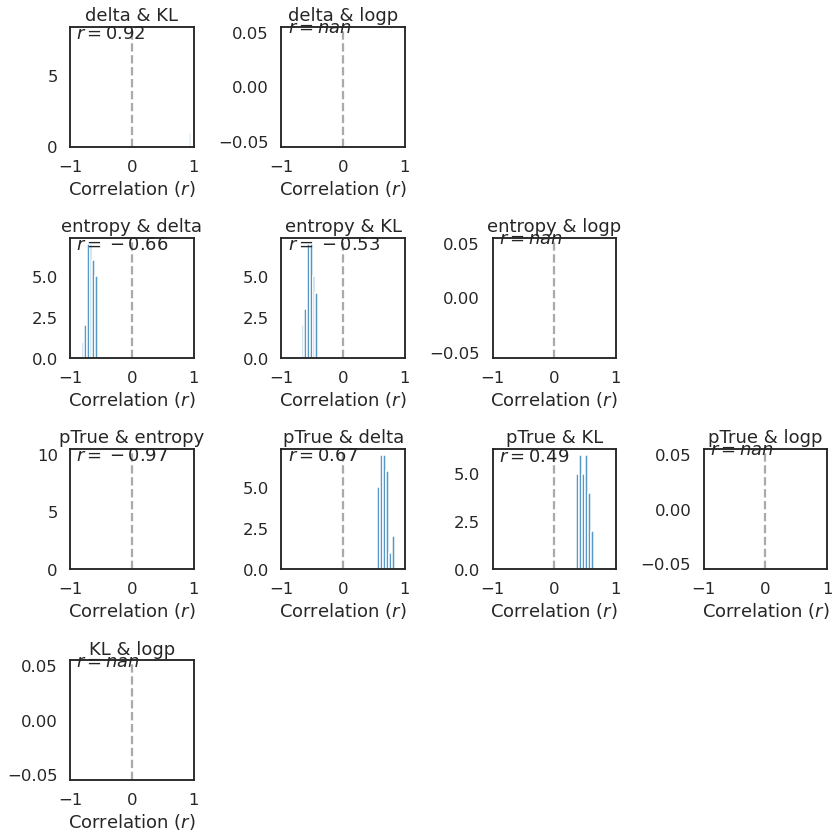

In [8]:
n_ax = len(param_reg)-1
fig,axes=plt.subplots(n_ax, n_ax, figsize=(12,12))
[ax.axis('off') for ax in axes.flatten()] # hide all panels

for i,r_i in enumerate(param_reg):
    for j,r_j in enumerate(param_reg[i+1:]):
        # Plot correlation
        group = corr_df[(corr_df.level_1 == r_i) & (corr_df.level_2 == r_j)]
        sns.histplot(group.r, ax=axes[2-i,j])
        
        # Format axes
        axes[2-i,j].set(ylabel='', xlabel=r'Correlation ($r$)', xlim=(-1,1), title = f'{r_i} & {r_j}')
        axes[2-i,j].axvline(x=0, linestyle='--', color='#aaa')
        axes[2-i,j].axis('on') # turn on used panels
        
        # Add correlation coefficient to plot
        axes[2-i,j].text(-0.9, axes[2-i,j].get_ylim()[-1]*.9, r'$r = %0.2f$' % group.r.mean())
                
fig.tight_layout()

### Check: Distributions of parametric regressors

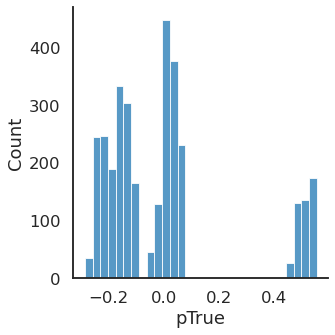

In [9]:
sns.displot(model_df.pTrue)

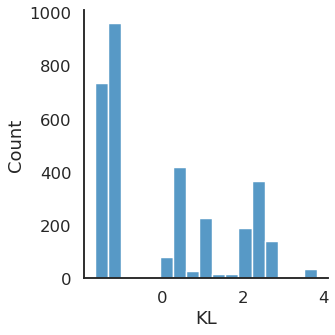

In [10]:
sns.displot(model_df.KL)

### Save final regressors to file

In [11]:
drop_reg = ['entropy', 'delta']
out_df = (
    model_df
    .copy()
    .drop(columns=drop_reg)
    .sort_values(by=['subject', 'run', 'block_idx', 'ex_idx'])
)

out_f = 'outputs/model_regressor_values.csv'
print(f'Saving to: {out_f}')
out_df.to_csv(out_f, index=False)
out_df.head()

Saving to: outputs/model_regressor_values.csv


,subject,run,block_idx,ex_idx,problem,pH,pTrue,KL,logp,pTrue_unscaled,KL_unscaled
59,1,1,0,0,22,"[0.3333333333333333, 0.3333333333333333, 0.0, ...",-0.126543,0.516503,-inf,0.333333,1.740425
60,1,1,0,1,22,"[0.5, 0.0, 0.0, 0.5]",0.040123,1.209600,-inf,0.500000,2.433523
49,1,1,1,0,18,"[0.5, 0.5, 0.0, 0.0]",0.040123,2.341827,-inf,0.500000,3.565749
50,1,1,1,1,18,"[0.5, 0.5, 0.0, 0.0]",0.040123,-1.223922,-inf,0.500000,0.000000
51,1,1,1,2,18,"[0.5, 0.5, 0.0, 0.0]",0.040123,-1.223922,-inf,0.500000,0.000000


## Alt model: Pragmatic learner

Find files:

In [12]:
prag_files = gsearch('outputs/fit_model-pragmatic_pref_cost_method-optimize/*.json')
prag_files.sort()

print(f'Found {len(prag_files)} files')
print(*prag_files[:10], sep='\n')
print('...')

Found 28 files
outputs/fit_model-pragmatic_pref_cost_method-optimize/sub-01_model-pragmatic_pref_cost_method-optimize_result.json
outputs/fit_model-pragmatic_pref_cost_method-optimize/sub-02_model-pragmatic_pref_cost_method-optimize_result.json
outputs/fit_model-pragmatic_pref_cost_method-optimize/sub-04_model-pragmatic_pref_cost_method-optimize_result.json
outputs/fit_model-pragmatic_pref_cost_method-optimize/sub-05_model-pragmatic_pref_cost_method-optimize_result.json
outputs/fit_model-pragmatic_pref_cost_method-optimize/sub-06_model-pragmatic_pref_cost_method-optimize_result.json
outputs/fit_model-pragmatic_pref_cost_method-optimize/sub-07_model-pragmatic_pref_cost_method-optimize_result.json
outputs/fit_model-pragmatic_pref_cost_method-optimize/sub-08_model-pragmatic_pref_cost_method-optimize_result.json
outputs/fit_model-pragmatic_pref_cost_method-optimize/sub-09_model-pragmatic_pref_cost_method-optimize_result.json
outputs/fit_model-pragmatic_pref_cost_method-optimize/sub-10_mode

Read parameters:

In [13]:
prag_weights = {}

for f in prag_files:
    # read model-fitting results
    res = read_json(f)

    # save subject, param values
    sub = int_extract('(?<=sub-)[0-9]{2}', f)
    sub_w = np.array(res['x'])

    prag_weights[sub] = sub_w
    
pprint.pprint(prag_weights)

{1: array([ 0.19940521, 41.68442052,  2.77013653]),
 2: array([ 0.09946635, 17.2635433 ,  2.94173811]),
 4: array([ 1.27379703, 53.62639476,  3.98438726]),
 5: array([ 0.28118079, 24.97930177,  2.69439725]),
 6: array([ 0.28082347, 28.08161526,  2.72264979]),
 7: array([3.82678631e-15, 3.65033791e+01, 1.72284871e+00]),
 8: array([ 0.26803051, 32.78196474,  2.70061946]),
 9: array([ 0.02024981, 16.38997481,  2.62371851]),
 10: array([ 1.01360385, 48.44892281,  4.35677498]),
 11: array([ 2.47007711, 26.03431246,  1.24790455]),
 12: array([ 2.46801119, 39.87520862,  2.92631097]),
 13: array([ 1.25035577, 40.8655791 ,  2.29961949]),
 14: array([0.22908025, 5.84834633, 5.52774868]),
 15: array([ 0.        , 30.65509717,  4.06207864]),
 16: array([ 0.12343923, 26.84467147,  3.66131189]),
 18: array([ 0.08836188, 32.67802881,  4.52466961]),
 19: array([ 0.76307566, 44.9685759 ,  3.47071575]),
 20: array([ 1.52878304, 35.40528198,  5.08772775]),
 21: array([ 0.56968224, 40.63842306,  1.8014390

Generate model predictions:

In [14]:
prag_list = []

for sub, sub_data in teach.human_df.groupby('subject'):
    print('===== sub-%02d =====' % sub)
    # get subject-specific weights
    sub_w = prag_weights[sub]

    for prob, prob_data in sub_data.groupby('problem'):
        preds = teach.utility_model_predictions(data=prob_data, 
                                                sampling_fun=teach.pedagogical_sampling,
                                                pref_fun=teach.edge_pref, 
                                                weights=sub_w,
                                                nIter=10)
        prag_list += preds

===== sub-01 =====
===== sub-02 =====
===== sub-04 =====
===== sub-05 =====
===== sub-06 =====
===== sub-07 =====
===== sub-08 =====
===== sub-09 =====
===== sub-10 =====
===== sub-11 =====
===== sub-12 =====
===== sub-13 =====
===== sub-14 =====
===== sub-15 =====
===== sub-16 =====
===== sub-18 =====
===== sub-19 =====
===== sub-20 =====
===== sub-21 =====
===== sub-22 =====
===== sub-23 =====
===== sub-24 =====
===== sub-25 =====
===== sub-26 =====
===== sub-27 =====
===== sub-28 =====
===== sub-29 =====
===== sub-30 =====


Clean up predictions:

In [15]:
# Clean up belief distribution
prag_raw = pd.DataFrame(prag_list)
prag_raw['pH'] = prag_raw.pH.apply(clean_ph)

kl_list = []
# Compute KL divergence with an adjustment for small probabilities
for name,group in prag_raw.groupby(['subject', 'problem']):
    prior = np.ones(4)/4 # start with a uniform prior
    
    for _, row in group.iterrows():
        pH_adjusted = row.pH + 0.0001 # small adjustment to fix divide-by-0 error
        belief = pH_adjusted/np.sum(pH_adjusted)
        kl = entropy(prior, belief)
        
        prior = belief # carry over belief dist from prior trial
        kl_list.append(kl)
        
prag_raw['KL'] = kl_list
prag_raw['logp'] = np.log(prag_raw['pTrue']/(1-prag_raw['pTrue']))

prag_raw.head()

,subject,run,block_idx,ex_idx,first_movement,start,problem,order,example,cursor_coords,...,cursor,model,lik,pD,pTrue,pH,entropy,delta,KL,logp
0,1,7,2,0,"[1, 5]","[0, 5]",0,"['C', 'D', 'A', 'B']",33,"[0, 5]",...,5,utility,0.045894,"[(0, 0.0), (1, 0.0), (2, 0.10654753444796423),...",0.689600,"[0.6896000001826819, 0.0, 0.0, 0.3103999998173...",0.619420,0.439600,3.604543,0.798250
1,1,7,2,1,"[1, 5]","[0, 5]",0,"['C', 'D', 'A', 'B']",32,"[5, 3]",...,33,utility,0.186463,"[(0, 0.0), (1, 0.0), (2, 0.057626908160116466)...",0.347401,"[0.34740091833405495, 0.0, 0.0, 0.652599081665...",0.645823,-0.342199,0.242005,-0.630483
2,1,7,2,2,"[1, 5]","[0, 5]",0,"['C', 'D', 'A', 'B']",2,"[5, 2]",...,32,utility,0.098014,"[(0, 0.0), (1, 0.0), (2, 0.09801430093680989),...",1.000000,"[1.0, 0.0, 0.0, 0.0]",0.000000,0.652599,5.363629,inf
3,1,1,2,0,"[5, 4]","[5, 5]",1,"['A', 'D', 'C', 'B']",31,"[5, 5]",...,35,utility,0.102218,"[(0, 0.0), (1, 0.04221802469317879), (2, 0.019...",0.058699,"[0.058699066220491404, 0.47065046688975426, 0....",0.875833,-0.191301,2.001812,-2.774839
4,1,1,2,1,"[5, 4]","[5, 5]",1,"['A', 'D', 'C', 'B']",1,"[5, 1]",...,31,utility,0.194406,"[(0, 0.0), (1, 0.19440558432468968), (2, 0.047...",1.000000,"[1.0, 0.0, 0.0, 0.0]",0.000000,0.941301,7.792454,inf


Save to dataframe:

In [16]:
# convert to df
prag_df = prag_raw.copy()
prag_df = (
    prag_df[['subject', 'run', 'block_idx', 'ex_idx', 'problem', 'pH', 'pTrue', 'KL']]
    .sort_values(by=['subject', 'run', 'block_idx', 'ex_idx'])
)
prag_df['pH'] = prag_df.pH.apply(list)
prag_df['pTrue_unscaled'] = prag_df['pTrue'].copy()
prag_df['KL_unscaled'] = prag_df['KL'].copy()

for r in ['pTrue', 'KL']:
    prag_df[r] = mean_center(r, df=prag_df)

prag_out = 'outputs/pragmatic_regressor_values.csv'
print(f'Saving to: {prag_out}')
prag_df.to_csv(prag_out, index=False)
prag_df.head()

Saving to: outputs/pragmatic_regressor_values.csv


,subject,run,block_idx,ex_idx,problem,pH,pTrue,KL,pTrue_unscaled,KL_unscaled
59,1,1,0,0,22,"[0.31966637719365176, 0.28409742653588654, 0.0...",-0.329058,0.212715,0.319666,1.747626
60,1,1,0,1,22,"[0.4129665541487166, 0.0, 0.0, 0.5870334458512...",-0.235758,0.486668,0.412967,2.021580
49,1,1,1,0,18,"[0.5897481309303209, 0.4102518690696791, 0.0, ...",-0.058976,2.039022,0.589748,3.573933
50,1,1,1,1,18,"[0.7272566035224621, 0.2727433964775378, 0.0, ...",0.078532,-1.491061,0.727257,0.043850
51,1,1,1,2,18,"[0.7500610004232523, 0.24993899957674764, 0.0,...",0.101336,-1.533552,0.750061,0.001359


## Control model: Time

Define time model:

In [17]:
def time_model(p):
    '''
    The time model is a control model that increases the learner's belief in the correct answer by a constant amount at
    each time step
    
    e.g.,   at t = 0, pH = [.25, .25, .25, .25]
            at t = 1, pH = [.5, .5/3, .5/3, .5/3]
            etc.
    
    Inputs:
    prob (dataframe): Data for a particular participant in a particular problem
    
    Outputs:
    time_preds (list): List of time model predictions
    '''
    time_preds = []

    prior = np.ones(4)*.25
    for _, row in p.iterrows():
        # update belief in the correct answer
        pTrue = .25*(row.ex_idx+2)

        # calculate belief update
        posterior = prior.copy()
        posterior[0] = pTrue
        posterior[1:] = (1-pTrue)/3

        posterior_adj = posterior + 0.0001 # small adjustment to fix divide-by-0 error
        belief = posterior_adj/np.sum(posterior_adj)
        kl = entropy(prior, belief)

        trial_data = row.to_dict()
        trial_data.update({'pTrue': pTrue, 'KL': kl})
        time_preds.append(trial_data)
    
    return time_preds

Generate time model predictions:

In [18]:
time_list = []

for sub, sub_data in teach.human_df.groupby('subject'):
    print('===== sub-%02d =====' % sub)

    for prob, prob_data in sub_data.groupby('problem'):
        preds = time_model(prob_data)
        time_list += preds

===== sub-01 =====
===== sub-02 =====
===== sub-04 =====
===== sub-05 =====
===== sub-06 =====
===== sub-07 =====
===== sub-08 =====
===== sub-09 =====
===== sub-10 =====
===== sub-11 =====
===== sub-12 =====
===== sub-13 =====
===== sub-14 =====
===== sub-15 =====
===== sub-16 =====
===== sub-18 =====
===== sub-19 =====
===== sub-20 =====
===== sub-21 =====
===== sub-22 =====
===== sub-23 =====
===== sub-24 =====
===== sub-25 =====
===== sub-26 =====
===== sub-27 =====
===== sub-28 =====
===== sub-29 =====
===== sub-30 =====


Assemble dataframe:

In [19]:
time_df = pd.DataFrame(time_list)
time_df = time_df[['subject', 'run', 'block_idx', 'ex_idx', 'problem', 'pTrue', 'KL']]
time_df['pTrue_unscaled'] = time_df['pTrue'].copy()
time_df['KL_unscaled'] = time_df['KL'].copy()

# mean-center parametric regressors
for r in ['pTrue', 'KL']:
    time_df[r] = mean_center(r, df=time_df)

time_f = 'outputs/control_regressor_values.csv'
print(f'Saving to: {time_f}')
time_df.to_csv(time_f, index=False)

print(time_df.shape)
time_df.head()

Saving to: outputs/control_regressor_values.csv
(3213, 9)


,subject,run,block_idx,ex_idx,problem,pTrue,KL,pTrue_unscaled,KL_unscaled
0,1,7,2,0,0,-0.25463,-1.944137,0.50,0.130712
1,1,7,2,1,0,-0.00463,-1.526076,0.75,0.548773
2,1,7,2,2,0,0.24537,3.446987,1.00,5.521836
3,1,1,2,0,1,-0.25463,-1.944137,0.50,0.130712
4,1,1,2,1,1,-0.00463,-1.526076,0.75,0.548773
